In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Class_heart_attack.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = data.drop('target',axis=1)
Y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [ ]:
xnewtrain,xvalid,ynewtrain,yvalid=train_test_split(xtrain,ytrain)

In [ ]:
# Define the model
model=Sequential()
model.add(Dense(13,activation='relu',input_dim=13))
model.add(Dense(20,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 20)                280       
                                                                 
 dense_6 (Dense)             (None, 50)                1050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,563
Trainable params: 1,563
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              metrics=[tf.keras.metrics.binary_accuracy],
              loss=tf.keras.losses.binary_crossentropy)

In [ ]:
hist = model.fit(xnewtrain,ynewtrain,batch_size=32,epochs=100,validation_data=(xvalid,yvalid))

Epoch 1/100
6/6 [==============================] - 2s 41ms/step - loss: 0.9236 - binary_accuracy: 0.5706 - val_loss: 0.8526 - val_binary_accuracy: 0.5614
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6589 - binary_accuracy: 0.6471 - val_loss: 0.7950 - val_binary_accuracy: 0.5088
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6128 - binary_accuracy: 0.6588 - val_loss: 0.7973 - val_binary_accuracy: 0.5965
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6231 - binary_accuracy: 0.6647 - val_loss: 0.7456 - val_binary_accuracy: 0.5614
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6035 - binary_accuracy: 0.6765 - val_loss: 0.7106 - val_binary_accuracy: 0.6491
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5910 - binary_accuracy: 0.6941 - val_loss: 0.7435 - val_binary_accuracy: 0.5965
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.595

In [ ]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Text(0, 0.5, 'Loss')

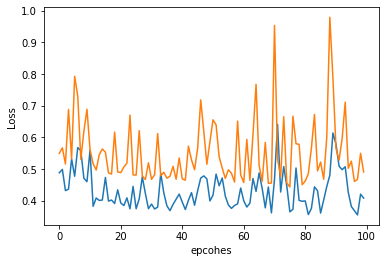

In [ ]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel("epcohes")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

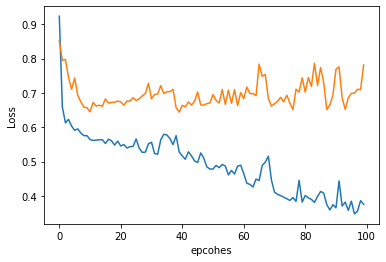

In [ ]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel("epcohes")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

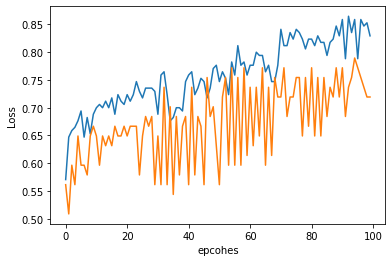

In [ ]:
plt.plot(hist.history['binary_accuracy'],label='Training Loss')
plt.plot(hist.history['val_binary_accuracy'],label='Validation Loss')
plt.xlabel("epcohes")
plt.ylabel("Loss")

In [ ]:
ypred=model.predict(xtest)

3/3 [==============================] - 0s 3ms/step


In [ ]:
from sklearn import metrics

In [ ]:
newypred=np.round(ypred)

In [ ]:
confusionmatrix = metrics.confusion_matrix(ytest, newypred)

In [ ]:
print(confusionmatrix)

[[16 18]
 [ 4 38]]


In [ ]:
pred1=np.ndarray.astype(newypred,dtype='int')

In [ ]:
data2 = pd.read_csv("")
data.head()